Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

In [5]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /home/matalhim/github/repositories/ml/game_of_thrones/game_of_thrones_test.csv
100%|██████████████████████████████████████| 37.3k/37.3k [00:00<00:00, 1.31MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /home/matalhim/github/repositories/ml/game_of_thrones/game_of_thrones_train.csv
100%|████████████████████████████████████████| 138k/138k [00:00<00:00, 2.01MB/s]


In [6]:
!mv game_of_thrones_test.csv test.csv
!mv game_of_thrones_train.csv train.csv
!mkdir dataset
!mv test.csv train.csv dataset

In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import ( 
    LabelEncoder,
)
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    
)
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from tqdm.notebook import tqdm

In [92]:
df = pd.read_csv('dataset/train.csv', index_col='S.No')
df.head(4)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0


In [93]:
len(df)

1557

In [94]:
df.isna().sum()

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

In [95]:
df.drop(columns=['title', 'name', 'dateOfBirth', 'mother', 'father', 'heir', 
                 'house', 'spouse', 'isAliveMother', 'isAliveFather', 
                 'isAliveHeir', 'isAliveSpouse', 'age'], inplace=True)
label = df.pop('isAlive')
df['label'] = label

In [96]:
df.head(4)

,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,label
S.No,,,,,,,,,,,,
1,1,NaN,0,0,0,0,0,0,0,11,0.605351,0
2,1,Rivermen,1,1,1,1,1,1,1,1,0.896321,1
3,1,NaN,0,0,0,1,0,0,1,0,0.267559,1
4,0,NaN,0,0,0,0,0,1,1,0,0.183946,0


In [97]:
df['boolDeadRelations'] = df['numDeadRelations'].apply(lambda x: 1 if x > 0 else -1)
df.pop('numDeadRelations');

In [98]:
df['isPopular'] = df['popularity'].apply(lambda x: 1 if x > 0.2 else -1)
df.pop('popularity')

S.No
1       0.605351
2       0.896321
3       0.267559
4       0.183946
5       0.043478
          ...   
1553    0.160535
1554    0.040134
1555    0.076923
1556    0.270903
1557    0.046823
Name: popularity, Length: 1557, dtype: float64

In [99]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def simplify_culture(value):
    if pd.isna(value) or value.strip() == '':
        return 'Unknown'
    
    value = value.lower()
    
    for key, synonyms in cult.items():
        if value in synonyms:
            return key 
    
    return 'Unknown' 

In [100]:
df['new_culture'] = df['culture'].apply(simplify_culture)
df.pop('culture')
label = df.pop('label')
df['label'] = label
df.head(4)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular,new_culture,label
S.No,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,1,1,Unknown,0
2,1,1,1,1,1,1,1,1,1,1,Unknown,1
3,1,0,0,0,1,0,0,1,-1,1,Unknown,1
4,0,0,0,0,0,0,1,1,-1,-1,Unknown,0


In [101]:
label_encoder = LabelEncoder()
df['new_culture'] = label_encoder.fit_transform(df['new_culture'])

df.head(4)      

,male,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular,new_culture,label
S.No,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,1,1,13,0
2,1,1,1,1,1,1,1,1,1,1,13,1
3,1,0,0,0,1,0,0,1,-1,1,13,1
4,0,0,0,0,0,0,1,1,-1,-1,13,0


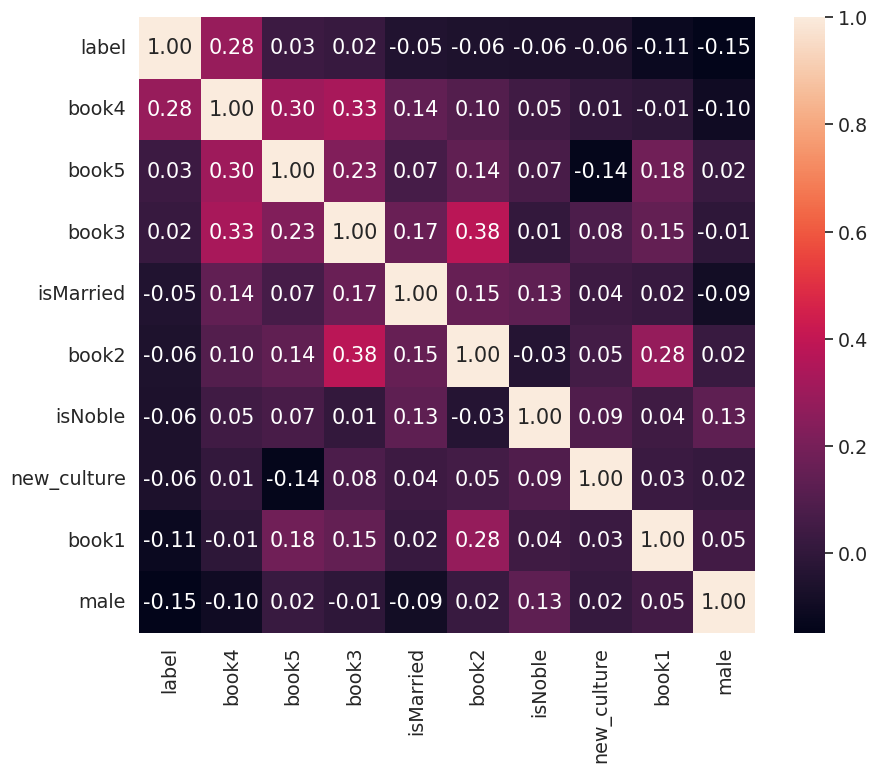

In [102]:
plt.figure(figsize=(10,8))
cormat = df.corr()
k = 10
cols = cormat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(df[cols].values.T)
sns.set_theme(font_scale=1.25)
hm = sns.heatmap(
    cm, 
    cbar=True, 
    annot=True, 
    square=True, 
    fmt='.2f',
    yticklabels=cols.values,
    xticklabels=cols.values,
)
plt.show()

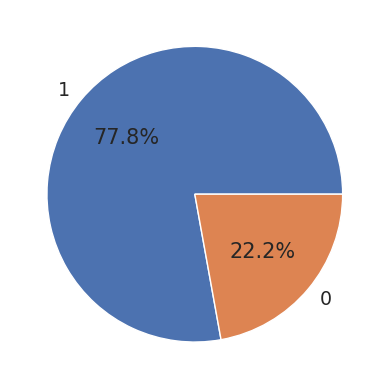

In [103]:
data = df['label'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.1f%%')
plt.show()

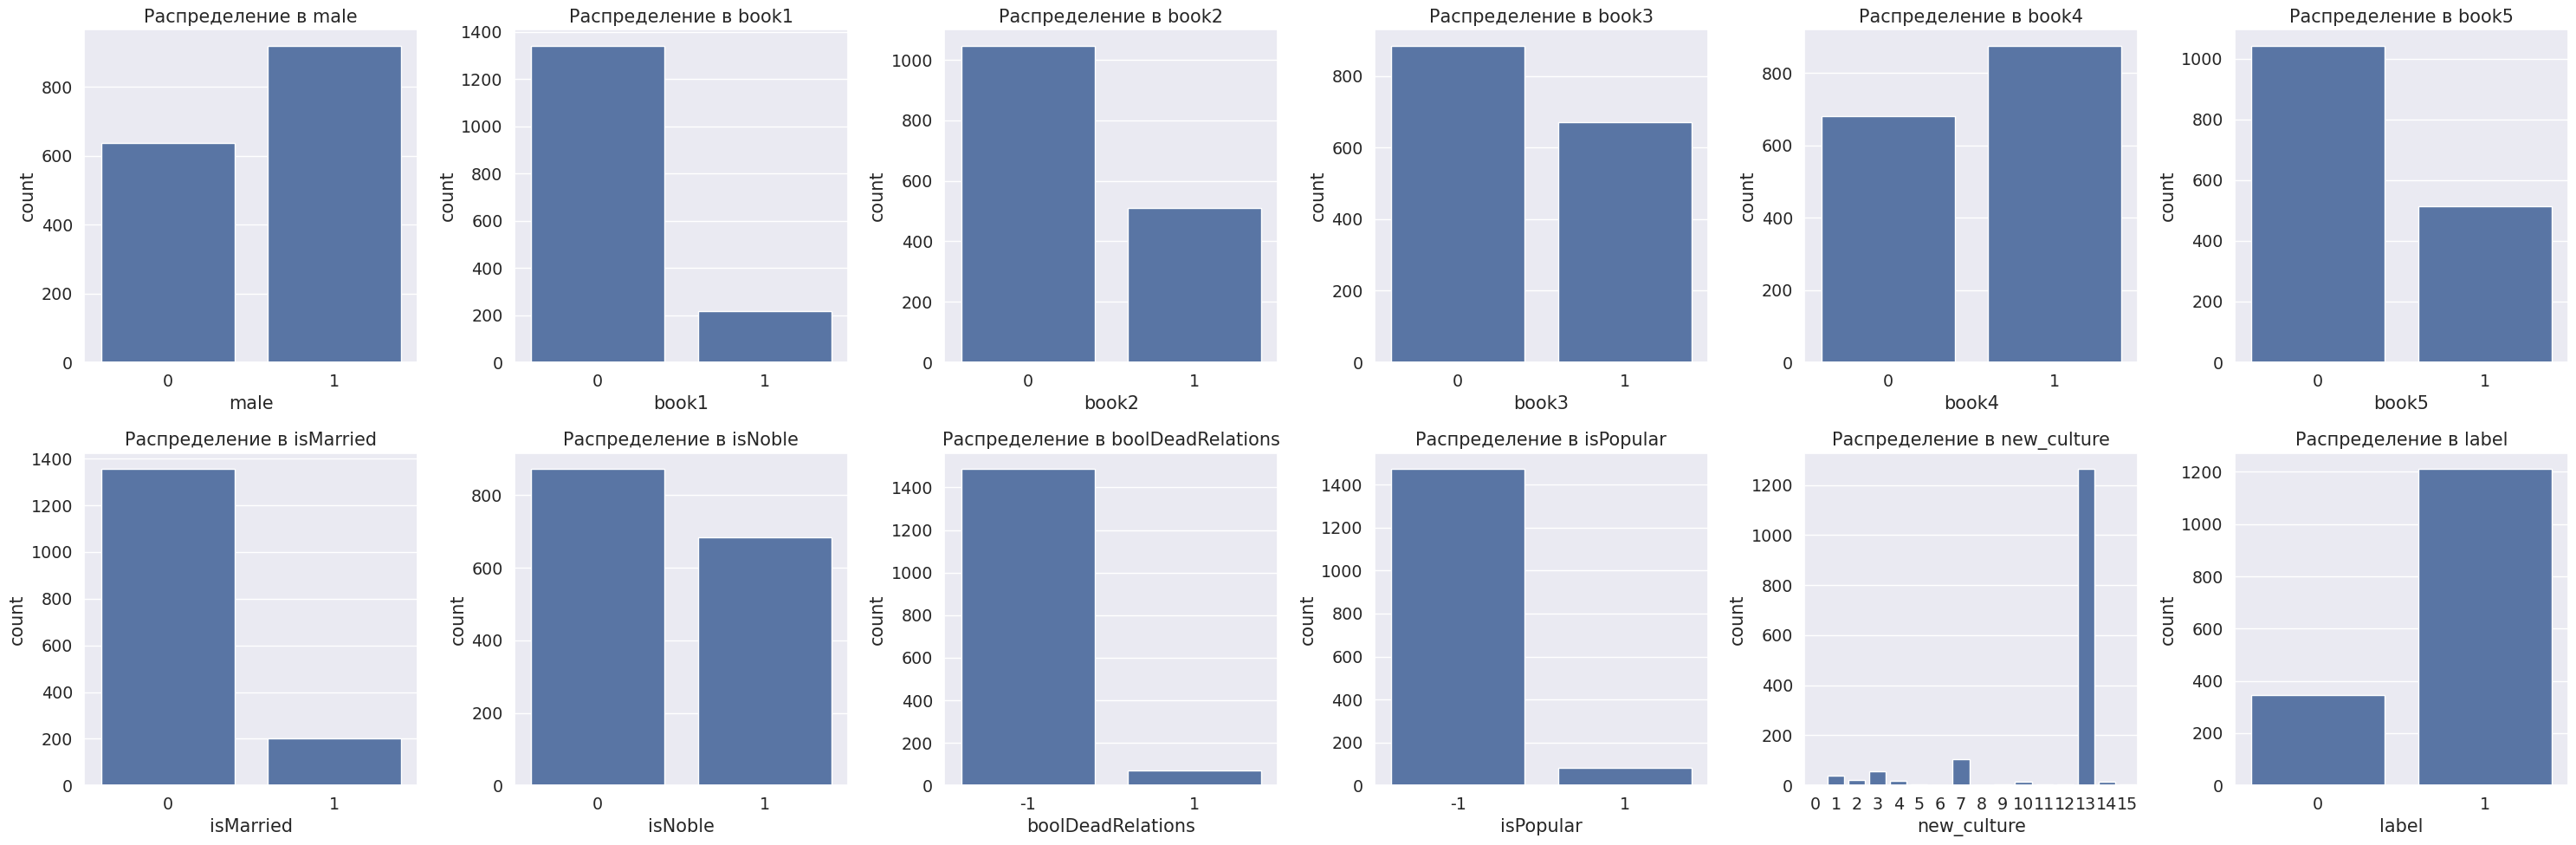

In [104]:
n_cols = 6
n_rows = (len(df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

axes = axes.flatten()

# Перебираем все столбцы
for i, column in enumerate(df.columns):
    if df[column].dtype == 'int64' or df[column].dtype == 'float64': 
        sns.countplot(x=column, data=df, ax=axes[i]) 
        axes[i].set_title(f"Распределение в {column}") 
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout() 
plt.show()



In [105]:
df.head(3)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular,new_culture,label
S.No,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,1,1,13,0
2,1,1,1,1,1,1,1,1,1,1,13,1
3,1,0,0,0,1,0,0,1,-1,1,13,1


In [106]:
X = df.drop(columns=['label']).values
y = df['label'].values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

In [108]:
logistic_regression = LogisticRegression(C=1)
logistic_regression.fit(X_train, y_train)
lr_y_pred = logistic_regression.predict(X_test)

In [109]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

In [110]:
aboost = AdaBoostClassifier(algorithm='SAMME')
aboost.fit(X_train, y_train)
aboost_y_pred = aboost.predict(X_test)

In [111]:
gpc = GaussianProcessClassifier()
gpc.fit(X_train, y_train)
gpc_y_pred = gpc.predict(X_test)

In [112]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)

In [113]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc_y_pred = knc.predict(X_test)

In [114]:
svc = SVC()
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

In [115]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

In [116]:
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print("lr accuracy : %.4f" % lr_accuracy)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("rf accuracy : %.4f" % rf_accuracy)

aboost_accuracy = accuracy_score(y_test, aboost_y_pred)
print("aboost accuracy : %.4f" % aboost_accuracy)

gpc_accuracy = accuracy_score(y_test, gpc_y_pred)
print("gpc accuracy : %.4f" % gpc_accuracy)

gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
print("gnb accuracy : %.4f" % gnb_accuracy)

knc_accuracy = accuracy_score(y_test, knc_y_pred)
print("knc accuracy : %.4f" % knc_accuracy)

svc_accuracy = accuracy_score(y_test, svc_y_pred)
print("svc accuracy : %.4f" % svc_accuracy)

dtc_accuracy = accuracy_score(y_test, dtc_y_pred)
print("dtc accuracy : %.4f" % dtc_accuracy)

lr accuracy : 0.7756
rf accuracy : 0.7564
aboost accuracy : 0.7756
gpc accuracy : 0.7692
gnb accuracy : 0.7660
knc accuracy : 0.7628
svc accuracy : 0.7660
dtc accuracy : 0.7500


In [31]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /home/matalhim/github/repositories/ml/game_of_thrones/submission.csv
100%|██████████████████████████████████████| 2.74k/2.74k [00:00<00:00, 8.49MB/s]


In [32]:
!mv submission.csv dataset

In [133]:
test_df = pd.read_csv('dataset/test.csv', index_col='S.No')
test_df.head(4)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736


In [134]:
test_df.drop(columns=['title', 'name', 'dateOfBirth', 'mother', 'father', 'heir',
                        'house', 'spouse', 'isAliveMother', 'isAliveFather',
                        'isAliveHeir', 'isAliveSpouse', 'age'], inplace=True)


In [135]:
test_df['boolDeadRelations'] = test_df['numDeadRelations'].apply(lambda x: 1 if x > 0 else -1)

In [136]:
test_df.pop('numDeadRelations');
test_df['isPopular'] = test_df['popularity'].apply(lambda x: 1 if x > 0.2 else -1)
test_df.pop('popularity')
test_df['new_culture'] = test_df['culture'].apply(simplify_culture)
test_df.pop('culture')
test_df.head(4)


,male,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular,new_culture
S.No,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0,-1,-1,Unknown
1559,0,0,1,1,1,1,0,0,-1,1,Asshai
1560,0,0,0,1,1,0,0,0,-1,-1,Unknown
1561,1,1,1,1,1,1,0,1,-1,1,Unknown


In [137]:
test_df['new_culture'] = label_encoder.fit_transform(test_df['new_culture'])

In [138]:
test_df.head(4)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,boolDeadRelations,isPopular,new_culture
S.No,,,,,,,,,,,
1558,0,0,0,0,0,1,0,0,-1,-1,13
1559,0,0,1,1,1,1,0,0,-1,1,0
1560,0,0,0,1,1,0,0,0,-1,-1,13
1561,1,1,1,1,1,1,0,1,-1,1,13


In [139]:
X = test_df.values

In [140]:
submission = pd.read_csv("dataset/submission.csv", index_col='S.No')


In [141]:
submission['isAlive'] = rf.predict(X)

In [142]:
submission.to_csv("dataset/new_submission.csv", index=False)